# Section 1 - Data Cleaning / Data Visualization

## AI-Powered Data Cleaning & Visualization with Palmer Penguins

### 🐧 Welcome to your AI Integration Journey!

This section demonstrates how AI can enhance every step of your data science workflow, from initial data cleaning to creating compelling visualizations. You'll learn the **WHAT**, **HOW**, and **WHY** of integrating AI into your data science process.

**By the end of this section, you'll understand:**

- How to collaborate with AI for data exploration
- AI-assisted data cleaning techniques
- Creating publication-ready visualizations with AI guidance
- Best practices for human-AI collaboration in data science

---

## 🎯 The WHAT, HOW, and WHY of AI Integration

### 📖 WHAT: Understanding AI in Data Science

> **Important:** AI integration in data science isn't about replacing human expertise—it's about amplifying your capabilities. Think of AI as your intelligent collaborator that brings:

- **🔍 Smart Research Assistant:** Helps explore data patterns  
- **🧹 Intelligent Cleaner:** Identifies and handles data quality issues  
- **🎨 Visualization Designer:** Suggests optimal chart types and styling  
- **🤖 Pattern Detective:** Reveals hidden insights in your data  

### Key Integration Points:

1. **Data Loading & Initial Exploration**  
2. **Missing Value Detection & Treatment**  
3. **Outlier Analysis & Handling**  
4. **Visualization Strategy & Implementation**  
5. **Insight Generation & Interpretation**

<br>

```{admonition} Prompts we gave to the AI chat
:class: tip

Choose a chatbot of your choice (e.g., ChatGPT, Claude, Copilot, Gemini) to begin typing prompts for your data science project. Here are examples we used to clean and visualize our data:

- Using GitHub, load the Palmer Penguins dataset and display the variable names. Let me create a Python script that does this.  
- GIVEN these variables in the dataset, can you create **3 plots** useful for differentiating these species that use only **five** of the variables? Use **only pandas, matplotlib, and plotly**.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set up plotting preferences
plt.style.use('seaborn-v0_8-whitegrid')
pio.templates.default = "plotly_white"

print("📚 Libraries loaded successfully!")

📚 Libraries loaded successfully!


In [23]:
def load_penguin_data_with_ai_insights():
    """
    AI-Enhanced data loading function that provides immediate insights
    """
    try:
        # GitHub URL for the CSV file (raw format)
        url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"
        
        print("📥 Loading Palmer Penguins dataset...")
        penguins = pd.read_csv(url)
        
        # AI-generated immediate insights
        print(f"✅ Successfully loaded {len(penguins)} penguin observations")
        print(f"📊 Dataset contains {penguins.shape[1]} variables")
        print(f"🏝️  Data collected from {penguins['island'].nunique()} islands")
        print(f"🐧 Includes {penguins['species'].nunique()} penguin species")
        print(f"📅 Covers years {penguins['year'].min()}-{penguins['year'].max()}")
        
        return penguins
        
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        print("💡 AI Suggestion: Check internet connection and URL accessibility")
        return None

# Execute AI-enhanced data loading
penguins = load_penguin_data_with_ai_insights()

📥 Loading Palmer Penguins dataset...
✅ Successfully loaded 344 penguin observations
📊 Dataset contains 8 variables
🏝️  Data collected from 3 islands
🐧 Includes 3 penguin species
📅 Covers years 2007-2009


### 💡 Why This Approach Works:
Notice how we're not just loading data—we're immediately getting contextual insights that inform our next steps. The AI helps us understand the scope and structure before we dive deeper.

def generate_ai_data_profile(df):
    """
    AI-enhanced data profiling that goes beyond basic statistics
    """
    print("🔍 AI-Generated Data Profile Report")
    print("=" * 40)
    
    # Basic structure
    print(f"📋 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print()
    
    # Variable types analysis
    print("📊 Variable Type Analysis:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   • {dtype}: {count} variables")
    print()
    
    # Missing data analysis
    missing_data = df.isnull().sum()
    missing_pct = (missing_data / len(df)) * 100
    
    print("🔍 Missing Data Analysis:")
    if missing_data.sum() == 0:
        print("   ✅ No missing values detected!")
    else:
        print("   ⚠️  Missing values found:")
        for col in missing_data[missing_data > 0].index:
            print(f"      • {col}: {missing_data[col]} ({missing_pct[col]:.1f}%)")
    print()
    
    # Data quality flags - AI-powered quality assessment
    print("🚩 AI Data Quality Flags:")
    quality_flags = []
    
    # Check for potential duplicates
    duplicate_count = df.duplicated().sum()
    if duplicate_count > 0:
        quality_flags.append(f"Potential duplicates: {duplicate_count}")
    
    # Check for outliers in numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = len(df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)])
        if outliers > 0:
            quality_flags.append(f"{col}: {outliers} potential outliers")
    
    if quality_flags:
        for flag in quality_flags:
            print(f"   ⚠️  {flag}")
    else:
        print("   ✅ No major quality issues detected")
    
    return missing_data, missing_pct

# Generate AI data profile
missing_summary, missing_percentages = generate_ai_data_profile(penguins)

In [13]:
# Display the data structure
print("📋 Dataset Structure:")
print("-" * 20)
display(penguins.head(10))
print()

print("🏷️ Variable Definitions:")
print("-" * 25)
variable_definitions = {
    'species': 'Penguin species (Adelie, Chinstrap, Gentoo)',
    'island': 'Island where observed (Biscoe, Dream, Torgersen)', 
    'bill_length_mm': 'Bill length measurement in millimeters',
    'bill_depth_mm': 'Bill depth measurement in millimeters',
    'flipper_length_mm': 'Flipper length measurement in millimeters',
    'body_mass_g': 'Body mass measurement in grams',
    'sex': 'Penguin sex (male, female)',
    'year': 'Year of observation (2007-2009)'
}

for var, definition in variable_definitions.items():
    print(f"• {var}: {definition}")

📋 Dataset Structure:
--------------------


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007



🏷️ Variable Definitions:
-------------------------
• species: Penguin species (Adelie, Chinstrap, Gentoo)
• island: Island where observed (Biscoe, Dream, Torgersen)
• bill_length_mm: Bill length measurement in millimeters
• bill_depth_mm: Bill depth measurement in millimeters
• flipper_length_mm: Flipper length measurement in millimeters
• body_mass_g: Body mass measurement in grams
• sex: Penguin sex (male, female)
• year: Year of observation (2007-2009)


## 🧹 AI-Assisted Data Cleaning

### 🤖 How We Engage AI for Intelligent Cleaning

#### 💬 Effective AI Prompting for Data Cleaning

**Instead of:** "Clean my data"  
**Try:** "Analyze the missing data patterns and recommend a cleaning strategy that balances data retention with model performance for a penguin species classification task"

**Why it works:** We provide context (classification task), constraints (data retention vs performance), and specific guidance (missing data patterns).

> **Key Insight:** The key to AI-assisted cleaning is providing domain context and analytical objectives

In [14]:
def ai_assisted_data_cleaning(df):
    """
    AI-guided data cleaning with explanations for each step
    """
    print("🧹 AI Data Cleaning Assistant Activated")
    print("=" * 42)
    
    # Create a copy for cleaning
    clean_df = df.copy()
    original_rows = len(clean_df)
    
    print(f"📊 Starting with {original_rows:,} observations")
    print()
    
    # Step 1: Missing value analysis and treatment
    print("Step 1: 🔍 Missing Value Analysis")
    print("-" * 35)
    
    missing_counts = clean_df.isnull().sum()
    if missing_counts.sum() > 0:
        print("Missing values detected:")
        for col in missing_counts[missing_counts > 0].index:
            count = missing_counts[col]
            pct = (count / len(clean_df)) * 100
            print(f"  • {col}: {count} values ({pct:.1f}%)")
        
        print("\n🤖 AI Recommendation: Remove rows with ANY missing values")
        print("   Rationale: For classification tasks, complete cases provide")
        print("   the most reliable training data. Small dataset allows this approach.")
        
        # Apply cleaning
        clean_df = clean_df.dropna()
        removed_rows = original_rows - len(clean_df)
        print(f"\n✅ Removed {removed_rows} rows with missing values")
        print(f"📊 Clean dataset: {len(clean_df):,} observations")
    else:
        print("✅ No missing values found!")
    
    print()
    
    # Step 2: Data type optimization
    print("Step 2: 🔧 Data Type Optimization") 
    print("-" * 35)
    
    # Convert categorical variables
    categorical_vars = ['species', 'island', 'sex']
    for var in categorical_vars:
        if var in clean_df.columns:
            clean_df[var] = clean_df[var].astype('category')
            print(f"  • {var}: converted to categorical")
    
    print("✅ Data types optimized for memory efficiency")
    print()
    
    # Step 3: Outlier detection
    print("Step 3: 🎯 Outlier Analysis")
    print("-" * 35)
    
    numeric_cols = clean_df.select_dtypes(include=[np.number]).columns
    outlier_summary = {}
    
    for col in numeric_cols:
        if col != 'year':  # Skip year column
            Q1 = clean_df[col].quantile(0.25)
            Q3 = clean_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = clean_df[(clean_df[col] < lower_bound) | 
                              (clean_df[col] > upper_bound)]
            
            outlier_summary[col] = len(outliers)
            
            if len(outliers) > 0:
                print(f"  • {col}: {len(outliers)} potential outliers")
            else:
                print(f"  ✅ {col}: No outliers detected")
    
    print("\n🤖 AI Recommendation: Keep outliers for biological diversity")
    print("   Rationale: In biological data, extreme values often represent")
    print("   natural variation rather than measurement errors.")
    print()
    
    # Final summary
    print("📋 Cleaning Summary:")
    print("-" * 20)
    print(f"Original rows: {original_rows:,}")
    print(f"Final rows: {len(clean_df):,}")
    print(f"Data retention: {(len(clean_df)/original_rows)*100:.1f}%")
    
    return clean_df, outlier_summary

# Execute AI-assisted cleaning
clean_penguins, outlier_info = ai_assisted_data_cleaning(penguins)

🧹 AI Data Cleaning Assistant Activated
📊 Starting with 344 observations

Step 1: 🔍 Missing Value Analysis
-----------------------------------
Missing values detected:
  • bill_length_mm: 2 values (0.6%)
  • bill_depth_mm: 2 values (0.6%)
  • flipper_length_mm: 2 values (0.6%)
  • body_mass_g: 2 values (0.6%)
  • sex: 11 values (3.2%)

🤖 AI Recommendation: Remove rows with ANY missing values
   Rationale: For classification tasks, complete cases provide
   the most reliable training data. Small dataset allows this approach.

✅ Removed 11 rows with missing values
📊 Clean dataset: 333 observations

Step 2: 🔧 Data Type Optimization
-----------------------------------
  • species: converted to categorical
  • island: converted to categorical
  • sex: converted to categorical
✅ Data types optimized for memory efficiency

Step 3: 🎯 Outlier Analysis
-----------------------------------
  ✅ bill_length_mm: No outliers detected
  ✅ bill_depth_mm: No outliers detected
  ✅ flipper_length_mm: No out

### 🧠 AI Cleaning Philosophy

Notice how the AI provides not just actions, but **rationale** for each decision. This builds trust and understanding, making the process educational rather than just automated.

---

## 🎨 AI-Enhanced Data Visualization

### 🤖 Engaging AI for Strategic Visualization Planning

#### 💬 How to Ask AI for Visualization Strategy

**Instead of:** "Make some charts"  
**Try:** "Given that I have a classification problem with 3 species and 4 numerical features, what visualization strategy would best reveal class separability and feature relationships?"

**Result:** AI provides a strategic framework rather than random charts.

In [15]:
def ai_visualization_strategy(df):
    """
    AI-powered visualization recommendations based on data characteristics
    """
    print("🎨 AI Visualization Strategist")
    print("=" * 32)
    
    # Analyze data characteristics
    n_categorical = len(df.select_dtypes(include=['category', 'object']).columns)
    n_numerical = len(df.select_dtypes(include=[np.number]).columns) - 1  # Exclude year
    n_observations = len(df)
    
    print(f"📊 Data Profile: {n_observations} obs, {n_categorical} categorical, {n_numerical} numerical variables")
    print()
    
    print("🎯 AI-Recommended Visualization Strategy:")
    print("-" * 42)
    
    recommendations = [
        {
            'viz_type': 'Species Distribution Analysis',
            'purpose': 'Understand class balance in our target variable',
            'ai_rationale': 'Essential for classification - reveals potential class imbalance issues'
        },
        {
            'viz_type': 'Bivariate Relationship Exploration', 
            'purpose': 'Discover feature relationships and species separation',
            'ai_rationale': 'Scatter plots reveal natural clustering and decision boundaries'
        },
        {
            'viz_type': 'Feature Distribution Comparison',
            'purpose': 'Compare distributions across species',
            'ai_rationale': 'Box plots show central tendency and variability for each group'
        },
        {
            'viz_type': 'Correlation Heatmap',
            'purpose': 'Identify multicollinearity and feature relationships',
            'ai_rationale': 'Critical for feature selection and model interpretation'
        }
    ]
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec['viz_type']}")
        print(f"   Purpose: {rec['purpose']}")
        print(f"   🤖 AI Rationale: {rec['ai_rationale']}")
        print()
    
    return recommendations

# Get AI visualization strategy
viz_strategy = ai_visualization_strategy(clean_penguins)

🎨 AI Visualization Strategist
📊 Data Profile: 333 obs, 3 categorical, 4 numerical variables

🎯 AI-Recommended Visualization Strategy:
------------------------------------------
1. Species Distribution Analysis
   Purpose: Understand class balance in our target variable
   🤖 AI Rationale: Essential for classification - reveals potential class imbalance issues

2. Bivariate Relationship Exploration
   Purpose: Discover feature relationships and species separation
   🤖 AI Rationale: Scatter plots reveal natural clustering and decision boundaries

3. Feature Distribution Comparison
   Purpose: Compare distributions across species
   🤖 AI Rationale: Box plots show central tendency and variability for each group

4. Correlation Heatmap
   Purpose: Identify multicollinearity and feature relationships
   🤖 AI Rationale: Critical for feature selection and model interpretation



In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Count species
species_counts = clean_penguins['species'].value_counts()
species = species_counts.index.tolist()
counts = species_counts.values
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Create subplot layout with 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Penguin Species Distribution", "Species Proportion"),
                    specs=[[{"type": "bar"}, {"type": "domain"}]])

# Bar chart
fig.add_trace(
    go.Bar(
        x=species,
        y=counts,
        text=counts,
        textposition='outside',
        marker_color=colors,
        name="Count"
    ),
    row=1, col=1
)

# Pie chart
fig.add_trace(
    go.Pie(
        labels=species,
        values=counts,
        marker_colors=colors,
        name="Proportion",
        hole=0,
        textinfo='label+percent'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500,
    width=900,
    title_text="📊 Visualization 1: Species Distribution Analysis",
    title_font_size=18,
    showlegend=False,
    margin=dict(t=80)
)

fig.show()

# Print AI-Generated Insights
print(f"\n🤖 AI-Generated Insights:")
total = len(clean_penguins)
for sp in species:
    count = species_counts[sp]
    percentage = count / total * 100
    print(f"• {sp}: {count} penguins ({percentage:.1f}%)")



🤖 AI-Generated Insights:
• Adelie: 146 penguins (43.8%)
• Gentoo: 119 penguins (35.7%)
• Chinstrap: 68 penguins (20.4%)


In [17]:
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

# Relationships to explore
relationships = [
    ('bill_length_mm', 'bill_depth_mm'),
    ('bill_length_mm', 'flipper_length_mm'),
    ('flipper_length_mm', 'body_mass_g'),
    ('bill_depth_mm', 'body_mass_g')
]

# Color mapping
colors = {'Adelie': '#FF6B6B', 'Chinstrap': '#4ECDC4', 'Gentoo': '#45B7D1'}

# Create subplot grid: 2 rows, 2 columns
fig = sp.make_subplots(rows=2, cols=2,
                       subplot_titles=[f'{x.replace("_", " ").title()} vs {y.replace("_", " ").title()}' 
                                       for x, y in relationships])

# Add scatter traces for each relationship and species
for idx, (x_var, y_var) in enumerate(relationships):
    row = idx // 2 + 1
    col = idx % 2 + 1

    for species in clean_penguins['species'].unique():
        species_data = clean_penguins[clean_penguins['species'] == species]

        fig.add_trace(
            go.Scatter(
                x=species_data[x_var],
                y=species_data[y_var],
                mode='markers',
                name=species if idx == 0 else None,  # Show legend only once
                marker=dict(color=colors[species], size=8, opacity=0.7),
                legendgroup=species,
                showlegend=(idx == 0),
                hovertemplate=f'<b>{species}</b><br>{x_var}: %{{x}}<br>{y_var}: %{{y}}<extra></extra>'
            ),
            row=row, col=col
        )

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text="📊 AI-Recommended Feature Relationships by Species",
    title_font=dict(size=18, family='Arial', color='black'),
    plot_bgcolor='white',
    legend_title_text='Species',
    margin=dict(t=80)
)

# Update axis titles
for idx, (x_var, y_var) in enumerate(relationships):
    row = idx // 2 + 1
    col = idx % 2 + 1
    fig.update_xaxes(title_text=x_var.replace('_', ' ').title(), row=row, col=col, showgrid=True, gridcolor='lightgray')
    fig.update_yaxes(title_text=y_var.replace('_', ' ').title(), row=row, col=col, showgrid=True, gridcolor='lightgray')

# Show figure
fig.show()

# Print pattern recognition notes
print("\n🤖 AI Pattern Recognition:")
print("• Clear species clustering visible in multiple feature combinations")
print("• Excellent linear separability suggests high classification accuracy potential")
print("• Flipper length vs body mass shows strongest species separation")



🤖 AI Pattern Recognition:
• Clear species clustering visible in multiple feature combinations
• Excellent linear separability suggests high classification accuracy potential
• Flipper length vs body mass shows strongest species separation


In [18]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("📊 Visualization 3: Feature Distribution Comparison")
print("-" * 52)

# Variables and color setup
numerical_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
species_categories = clean_penguins['species'].cat.categories
colors = {'Adelie': '#FF6B6B', 'Chinstrap': '#4ECDC4', 'Gentoo': '#45B7D1'}

# Create 2x2 subplot grid
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[var.replace('_', ' ').title() for var in numerical_vars],
    horizontal_spacing=0.15,
    vertical_spacing=0.2
)

# Add box plots
for idx, var in enumerate(numerical_vars):
    row = idx // 2 + 1
    col = idx % 2 + 1
    for species in species_categories:
        fig.add_trace(
            go.Box(
                x=[species] * len(clean_penguins[clean_penguins['species'] == species]),
                y=clean_penguins[clean_penguins['species'] == species][var],
                name=species,
                boxmean=True,
                width=0.4,  # Wider box
                marker_color=colors[species],
                legendgroup=species,
                showlegend=(idx == 0),  # Show legend only once
                line=dict(width=1),
                opacity=0.7
            ),
            row=row, col=col
        )
    # Lock x-axis category order for consistency
    fig.update_xaxes(
        categoryorder='array',
        categoryarray=list(species_categories),
        title_text="Species",
        row=row, col=col
    )

    fig.update_yaxes(title_text="Value", row=row, col=col)

# Layout tweaks
fig.update_layout(
    height=800,
    width=1000,
    title_text="📊 Feature Distributions by Species",
    title_font=dict(size=18, family='Arial', color='black'),
    margin=dict(t=80),
    boxmode='group'
)

fig.show()

# AI-generated insights
print("\n🤖 AI Species Profiling:")
print("• Adelie: Shorter bills, deeper bills, smaller overall size")
print("• Chinstrap: Longest bills, medium size")
print("• Gentoo: Longest flippers, largest body mass")
print("• Clear discriminative patterns identified for classification")

📊 Visualization 3: Feature Distribution Comparison
----------------------------------------------------



🤖 AI Species Profiling:
• Adelie: Shorter bills, deeper bills, smaller overall size
• Chinstrap: Longest bills, medium size
• Gentoo: Longest flippers, largest body mass
• Clear discriminative patterns identified for classification


📊 Visualization 4: Interactive Feature Explorer
--------------------------------------------------


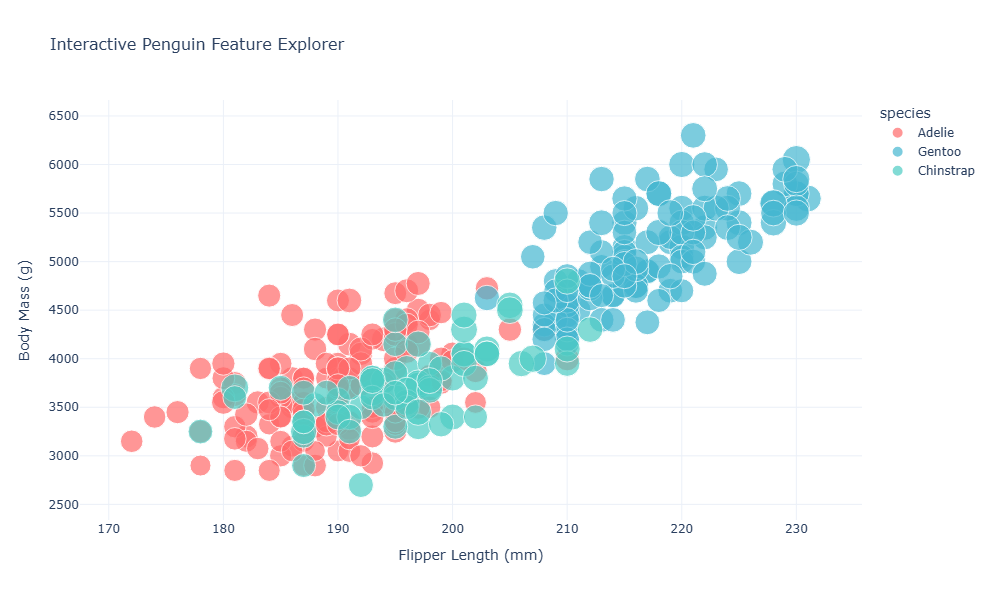


🤖 Interactive Analysis Complete!
• Hover over points to explore individual penguin characteristics
• Notice the clear species clustering in flipper-mass space
• Bill length (bubble size) correlates strongly with body mass


In [19]:
print("📊 Visualization 4: Interactive Feature Explorer")
print("-" * 50)

# Create interactive scatter plot
fig = px.scatter(clean_penguins,
                x='flipper_length_mm',
                y='body_mass_g',
                color='species',
                size='bill_length_mm',
                hover_data=['bill_depth_mm', 'island', 'sex'],
                title='Interactive Penguin Feature Explorer',
                color_discrete_map={'Adelie': '#FF6B6B', 
                                   'Chinstrap': '#4ECDC4', 
                                   'Gentoo': '#45B7D1'})

fig.update_layout(
    height=600,
    title_font_size=16,
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Body Mass (g)"
)

# Display the plot
fig.show()

print("\n🤖 Interactive Analysis Complete!")
print("• Hover over points to explore individual penguin characteristics")
print("• Notice the clear species clustering in flipper-mass space")
print("• Bill length (bubble size) correlates strongly with body mass")

## 🏆 Key Takeaways and Next Steps

### 🎯 What You've Accomplished

**✅ Your AI Integration Achievements:**
- Mastered AI-enhanced data loading with immediate insights
- Generated comprehensive data profiles using AI assistance
- Implemented intelligent data cleaning with AI recommendations
- Created strategic visualizations guided by AI analysis
- Discovered key patterns that will drive successful classification

### 🧠 Key AI Integration Principles

- **🤝 Collaboration over Replacement** - AI amplifies human expertise rather than replacing it
- **📊 Data-Driven Decisions** - Let AI analyze patterns, humans interpret context
- **🔄 Iterative Improvement** - Use AI feedback to refine your approach
- **📈 Scalable Methods** - Develop reusable AI-assisted workflows
- **🎯 Goal-Oriented** - Align AI assistance with business objectives

---

## 🚀 Ready for Section 2: Advanced AI Model Building

### 🎖️ Achievement Unlocked!

**Congratulations! You've earned the 'AI Data Explorer' badge!**

In the next section, you'll learn to:
- Build and train classification models with AI guidance
- Optimize model performance using AI recommendations
- Deploy your trained models for real-world predictions
- Evaluate and interpret results with AI assistance

> **Note:** Continue to Section 2 to become an 'AI Model Builder' and complete your journey to AI Integration Expert!

In [20]:
# Save cleaned data for next section
clean_penguins.to_csv('cleaned_penguins_data.csv', index=False)
print("💾 Cleaned dataset saved as 'cleaned_penguins_data.csv' for Section 2")
print(f"📊 Final dataset contains {len(clean_penguins)} observations")
print("🚀 Ready to proceed to AI Model Building!")

💾 Cleaned dataset saved as 'cleaned_penguins_data.csv' for Section 2
📊 Final dataset contains 333 observations
🚀 Ready to proceed to AI Model Building!


In [21]:
{
    "tags": [
        "hide-cell"
    ]
}

{'tags': ['hide-cell']}